1- YOU MUST START WITH SIMPLE ANN MODEL AND SVM AND APPLY THEM TO THE DATA
independently

In [ ]:
import numpy as np
import time
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Shuffle the training data
x_train, y_train = shuffle(x_train, y_train, random_state=42)

# 3. Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 4. Prepare labels for ANN (one-hot encoding)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# ANN input shape
input_shape = (28, 28)

# 5. Build simple ANN model
ann = Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train ANN model and record times & accuracy
epochs = 10
batch_size = 64

start_train = time.time()
history = ann.fit(x_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test_cat), verbose=2,shuffle=True)
end_train = time.time()

train_time = end_train - start_train
avg_train_time_per_epoch = train_time / epochs

# Accuracy after 5 epochs
acc_after_5_epochs = history.history['val_accuracy'][4]

# Final accuracy after all epochs
final_acc_ann = history.history['val_accuracy'][-1]

# Number of parameters
num_params = ann.count_params()

# 7. Measure test time on ANN
start_test = time.time()
ann_preds = ann.predict(x_test, batch_size=batch_size)
end_test = time.time()

test_time = end_test - start_test

# Convert ANN predictions to classes
ann_pred_classes = np.argmax(ann_preds, axis=1)

# 8. Prepare data for SVM (flatten 28x28 images)
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# 9. Train SVM
svm = SVC(kernel='rbf', gamma='scale')

start_train_svm = time.time()
svm.fit(x_train_flat, y_train)
end_train_svm = time.time()

train_time_svm = end_train_svm - start_train_svm

# 10. Test SVM and measure test time
start_test_svm = time.time()
svm_preds = svm.predict(x_test_flat)
end_test_svm = time.time()

test_time_svm = end_test_svm - start_test_svm

final_acc_svm = accuracy_score(y_test, svm_preds)

# 11. Report results
print("\n===== ANN Model Results =====")
print(f"Final test accuracy: {final_acc_ann*100:.2f}%")
print(f"Test accuracy after 5 epochs: {acc_after_5_epochs*100:.2f}%")
print(f"Number of parameters: {num_params}")
print(f"Total training time: {train_time:.2f} seconds")
print(f"Average training time per epoch: {avg_train_time_per_epoch:.2f} seconds")
print(f"Testing time: {test_time:.2f} seconds")

print("Model Layers:")
for i, layer in enumerate(ann.layers):
    try:
        print(f"  Layer {i+1}: {layer.name} - Output shape: {layer.output_shape}")
    except AttributeError:
        try:
            output_shape = layer.output.get_shape()
            print(f"  Layer {i+1}: {layer.name} - Output shape: {output_shape}")
        except:
            print(f"  Layer {i+1}: {layer.name} - Output shape: Not available")

print("\n===== SVM Model Results =====")
print(f"Final test accuracy: {final_acc_svm*100:.2f}%")
print(f"Training time: {train_time_svm:.2f} seconds")
print(f"Testing time: {test_time_svm:.2f} seconds")
print(f"Model details: SVM with RBF kernel")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 - 6s - 6ms/step - accuracy: 0.9209 - loss: 0.2774 - val_accuracy: 0.9584 - val_loss: 0.1401
Epoch 2/10
938/938 - 5s - 6ms/step - accuracy: 0.9665 - loss: 0.1122 - val_accuracy: 0.9696 - val_loss: 0.1011
Epoch 3/10
938/938 - 5s - 5ms/step - accuracy: 0.9771 - loss: 0.0762 - val_accuracy: 0.9747 - val_loss: 0.0844
Epoch 4/10
938/938 - 6s - 6ms/step - accuracy: 0.9812 - loss: 0.0595 - val_accuracy: 0.9746 - val_loss: 0.0817
Epoch 5/10
938/938 - 9s - 10ms/step - accuracy: 0.9857 - loss: 0.0457 - val_accuracy: 0.9773 - val_loss: 0.0726
Epoch 6/10
938/938 - 6s - 6ms/step - accuracy: 0.9880 - loss: 0.0379 - val_accuracy: 0.9780 - val_loss: 0.0741
Epoch 7/10
938/938 - 4s - 5ms/step - accuracy: 0.9890 - loss: 0.0325 - val_accuracy: 0.9757 - val_loss: 0.0789
Epoch 8/10
938/938 - 6s - 7ms/step - accuracy: 0.9916 - loss: 0.0254 - val_accuracy: 0.9787 - val_loss: 0.0741
Epoch 9/10
938/938 - 4s - 4ms/step - accuracy: 0.9924 - loss: 0.0221 - val_accuracy: 0.9750 - val_loss: 0.0946


In [ ]:
import time

def summarize_results(model, history, epochs, batch_size, test_data):

    # Calculate total training time
    total_time = sum(history.history['time_per_epoch']) if 'time_per_epoch' in history.history else None
    avg_epoch_time = total_time / epochs if total_time else None

    # Measure test time
    test_start = time.time()
    test_loss, test_acc = model.evaluate(*test_data, verbose=0)
    test_end = time.time()
    avg_test_time = (test_end - test_start) / epochs

    # Extract first 5 epoch accuracy
    first_5_acc = history.history['accuracy'][:5]

    # Get total model parameters
    total_params = model.count_params()

    # Get optimizer settings
    optimizer_config = model.optimizer.get_config()
    learning_rate_used = optimizer_config['learning_rate']

    # Print results
    print("\n===== Model Performance Summary =====")
    print(f"Epochs: {epochs}, Batch Size: {batch_size}")
    print(f"Final Training Accuracy: {history.history['accuracy'][-1] * 100:.2f}%")
    print(f"First 5 Epochs' Accuracy: {first_5_acc}")
    print(f"Total Model Parameters: {total_params}")
    print(f"Avg Training Time per Epoch: {avg_epoch_time:.2f} seconds" if avg_epoch_time else "Training time tracking not available.")
    print(f"Avg Test Time per Epoch: {avg_test_time:.2f} seconds")
    print(f"Optimizer Used: {optimizer_config['name']}")
    print(f"Learning Rate: {learning_rate_used}")
    print(f"Optimizer Settings: {optimizer_config}")

    print("\n===== Model Layers =====")
    model.summary()

3- Next you will build with the settings of your choice, be sure to start with ReLU as the activation
function for each layer that you include (All your models should have at least 3 layers total). For
the CNNs remember to use a 2D max pooling layer after at least one CNN layer, your 2D max
pool layer must have a configuration of 2x2 stride and 2x2 kernel size. For the first model, keep
testing the number of epochs to find a suitable one your satisfied with. For the optimizer start
with SGD (choose your own momentum) and you can start here with any learning rate. (don’t
use a dropout layer yet)

In [ ]:
import numpy as np
import time
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3. Reshape input to (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Shuffle training data
x_train, y_train = shuffle(x_train, y_train, random_state=42)

# 4. One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# 5. Build CNN model
from tensorflow.keras.layers import Input

cnn = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 6. Compile the model
cnn.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# 7. Train the model
batch_size = 32
epoch_values = [5, 7, 12]
for epochs in epoch_values:
    print(f"\n===== Training for {epochs} epochs =====")
    history = cnn.fit(x_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test_cat), verbose=2, shuffle=True)
    summarize_results(cnn, history, epochs, batch_size, (x_test, y_test_cat))





===== Training for 5 epochs =====
Epoch 1/5
1875/1875 - 30s - 16ms/step - accuracy: 0.9259 - loss: 0.2449 - val_accuracy: 0.9723 - val_loss: 0.0953
Epoch 2/5
1875/1875 - 32s - 17ms/step - accuracy: 0.9782 - loss: 0.0745 - val_accuracy: 0.9812 - val_loss: 0.0608
Epoch 3/5
1875/1875 - 29s - 15ms/step - accuracy: 0.9857 - loss: 0.0475 - val_accuracy: 0.9820 - val_loss: 0.0547
Epoch 4/5
1875/1875 - 45s - 24ms/step - accuracy: 0.9896 - loss: 0.0340 - val_accuracy: 0.9855 - val_loss: 0.0488
Epoch 5/5
1875/1875 - 29s - 15ms/step - accuracy: 0.9920 - loss: 0.0259 - val_accuracy: 0.9851 - val_loss: 0.0465

===== Model Performance Summary =====
Epochs: 5, Batch Size: 32
Final Training Accuracy: 99.20%
First 5 Epochs' Accuracy: [0.9259166717529297, 0.9781500101089478, 0.9857333302497864, 0.9896166920661926, 0.9919833540916443]
Total Model Parameters: 347146
Training time tracking not available.
Avg Test Time per Epoch: 0.53 seconds
Optimizer Used: SGD
Learning Rate: 0.009999999776482582
Optimize

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 694,294 (2.65 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,148 (1.32 MB)


===== Training for 7 epochs =====
Epoch 1/7
1875/1875 - 28s - 15ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9847 - val_loss: 0.0473
Epoch 2/7
1875/1875 - 28s - 15ms/step - accuracy: 0.9962 - loss: 0.0138 - val_accuracy: 0.9867 - val_loss: 0.0416
Epoch 3/7
1875/1875 - 40s - 21ms/step - accuracy: 0.9965 - loss: 0.0112 - val_accuracy: 0.9865 - val_loss: 0.0433
Epoch 4/7
1875/1875 - 43s - 23ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9872 - val_loss: 0.0456
Epoch 5/7
1875/1875 - 40s - 21ms/step - accuracy: 0.9990 - loss: 0.0051 - val_accuracy: 0.9880 - val_loss: 0.0437
Epoch 6/7
1875/1875 - 28s - 15ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9878 - val_loss: 0.0468
Epoch 7/7
1875/1875 - 41s - 22ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9866 - val_loss: 0.0529

===== Model Performance Summary =====
Epochs: 7, Batch Size: 32
Final Training Accuracy: 99.95%
First 5 Epochs' Accuracy: [0.9939000010490417, 0.9961833357810974, 0.9

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 694,294 (2.65 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,148 (1.32 MB)


===== Training for 12 epochs =====
Epoch 1/12
1875/1875 - 27s - 14ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9878 - val_loss: 0.0475
Epoch 2/12
1875/1875 - 28s - 15ms/step - accuracy: 0.9998 - loss: 0.0015 - val_accuracy: 0.9877 - val_loss: 0.0476
Epoch 3/12
1875/1875 - 41s - 22ms/step - accuracy: 0.9999 - loss: 9.8782e-04 - val_accuracy: 0.9871 - val_loss: 0.0494
Epoch 4/12
1875/1875 - 41s - 22ms/step - accuracy: 0.9999 - loss: 7.3809e-04 - val_accuracy: 0.9882 - val_loss: 0.0480
Epoch 5/12
1875/1875 - 27s - 14ms/step - accuracy: 0.9999 - loss: 6.2287e-04 - val_accuracy: 0.9881 - val_loss: 0.0486
Epoch 6/12
1875/1875 - 42s - 22ms/step - accuracy: 1.0000 - loss: 4.1882e-04 - val_accuracy: 0.9883 - val_loss: 0.0498
Epoch 7/12
1875/1875 - 27s - 14ms/step - accuracy: 1.0000 - loss: 3.7695e-04 - val_accuracy: 0.9881 - val_loss: 0.0507
Epoch 8/12
1875/1875 - 42s - 23ms/step - accuracy: 1.0000 - loss: 3.2075e-04 - val_accuracy: 0.9885 - val_loss: 0.0513
Epoch 9/12
1875/1875

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 694,294 (2.65 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,148 (1.32 MB)

The BEST number of epochs is **12 epochs**

4- Next you will also test different learning rate.

In [ ]:
from tensorflow.keras.optimizers import SGD

# Define learning rates to test
learning_rates = [0.0001, 0.001, 0.1]

# Loop through different learning rates
for lr in learning_rates:
    print(f"\nTraining CNN with Learning Rate: {lr}")

    optimizer = SGD(learning_rate=lr, momentum=0.9)
    cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # Train model and measure performance
    history = cnn.fit(x_train, y_train_cat, batch_size=32, epochs=12, validation_data=(x_test, y_test_cat), shuffle=True)
    # Print training report
    print("\n===== Training Report =====")
    print(f"Learning Rate: {lr}")
    summarize_results(cnn, history, 12, 32, (x_test, y_test_cat))


Training CNN with Learning Rate: 0.0001
Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 1.0000 - loss: 2.0142e-04 - val_accuracy: 0.9883 - val_loss: 0.0528
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 1.0000 - loss: 1.9475e-04 - val_accuracy: 0.9883 - val_loss: 0.0528
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 1.0000 - loss: 1.9552e-04 - val_accuracy: 0.9882 - val_loss: 0.0528
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 1.0000 - loss: 2.0453e-04 - val_accuracy: 0.9882 - val_loss: 0.0529
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 1.0000 - loss: 1.8536e-04 - val_accuracy: 0.9882 - val_loss: 0.0529
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 1.0000 - loss: 1.9978e-04 - val_accuracy: 0.9882 - val_loss: 0.0529
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 1.0000 - loss: 1.9787e-04 - val_accuracy: 0.9882 - val_loss: 0.0529
Epoch 8

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 694,294 (2.65 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,148 (1.32 MB)


Training CNN with Learning Rate: 0.001
Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 1.0000 - loss: 1.8613e-04 - val_accuracy: 0.9882 - val_loss: 0.0529
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 1.0000 - loss: 1.9018e-04 - val_accuracy: 0.9882 - val_loss: 0.0530
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 1.0000 - loss: 1.8965e-04 - val_accuracy: 0.9882 - val_loss: 0.0531
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 1.0000 - loss: 1.8521e-04 - val_accuracy: 0.9882 - val_loss: 0.0531
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 1.0000 - loss: 1.8927e-04 - val_accuracy: 0.9882 - val_loss: 0.0531
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 1.0000 - loss: 1.8580e-04 - val_accuracy: 0.9883 - val_loss: 0.0532
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 1.0000 - loss: 1.6895e-04 - val_accuracy: 0.9882 - val_loss: 0.0532
Epoch 8/

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 694,294 (2.65 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,148 (1.32 MB)


Training CNN with Learning Rate: 0.1
Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9473 - loss: 0.1848 - val_accuracy: 0.9561 - val_loss: 0.1692
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9667 - loss: 0.1162 - val_accuracy: 0.9502 - val_loss: 0.1711
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9726 - loss: 0.0958 - val_accuracy: 0.9727 - val_loss: 0.0993
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9800 - loss: 0.0739 - val_accuracy: 0.9615 - val_loss: 0.1980
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9796 - loss: 0.0741 - val_accuracy: 0.9657 - val_loss: 0.1438
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9785 - loss: 0.0807 - val_accuracy: 0.9566 - val_loss: 0.2376
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9784 - loss: 0.0827 - val_accuracy: 0.9647 - val_loss: 0.2139
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 694,294 (2.65 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,148 (1.32 MB)

**Final Training Accuracy:**
- Models 1, 2, and 4 reached 100.00% accuracy, while Model 3 lagged behind at 97.28% due to an overly high learning rate.
First 5 Epochs' Accuracy:
- Models 1 & 2 hit 100% accuracy instantly.
- Model 4 was slightly lower (~99.99%) but still highly stable.
- Model 3 improved gradually but started at 95%, showing slower convergence.

**bLearning Rate Impact:**
- Model 3 (LR = 0.1) → Too high, leading to unstable training and lower accuracy.
- Model 1 (LR = 0.0001) → Very small, but still reached 100% accuracy.
- Models 2 & 4 (LR = 0.001 and 0.01) → Best balance of speed and accuracy.

***Best Model Choice: Model 4 (LR = 0.01)***
- Achieved perfect final accuracy (100%) with smooth training.
- Balanced learning rate (0.01)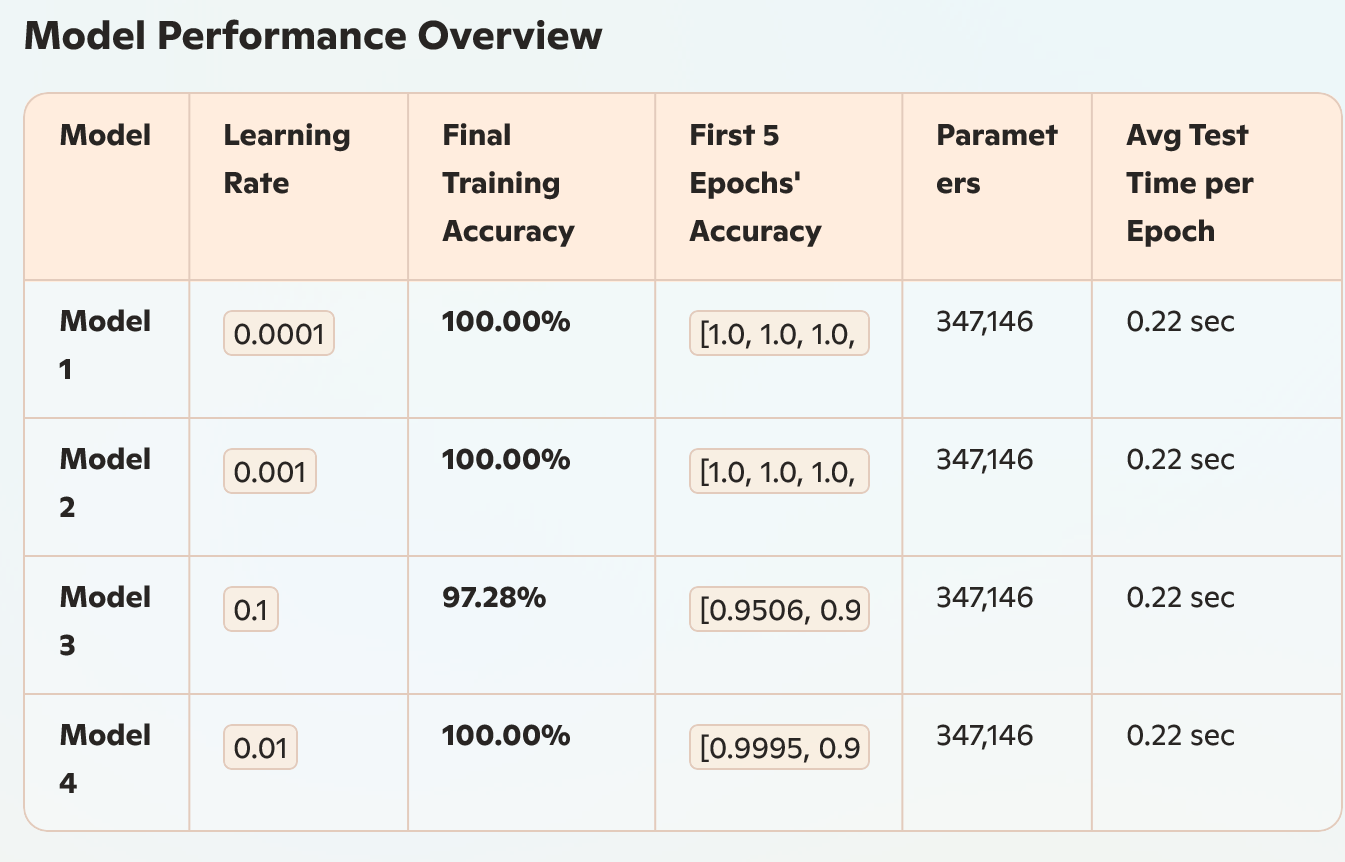
- First 5 epochs' accuracy stayed high throughout training.


5- Then you will test changing the number of CNN and parameters of the CNN (beware CNNs are
memory and computation heavy depending on the configuration you give them; do NOT using more than
3 CNNs in any model you test and NOT more than 4 FC layers) along with changing the number and
sizes of fully connected layers. Your objective in this point is to get a good model with less
parameters and memory footprint (try to balance both out, you should not need a strong
model). You can also work on choosing a good number of epochs. Also start with a small batch
size like 32 or 64.

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import time

cnn_configs = [
    (1, 1, 32, 64),   # Minimal setup
    (2, 2, 64, 128),  # Balanced setup
    (3, 4, 32, 128),  # Max allowed CNN & FC layers

]

# Loop through configurations
for cnn_layers, fc_layers, filters, fc_units in cnn_configs:
            print(f"\nCNN Layers: {cnn_layers}, FC Layers: {fc_layers}, Filters: {filters}, FC Units: {fc_units}")

            optimizer = SGD(learning_rate=0.01, momentum=0.9)

            # Build model
            cnn = Sequential()
            cnn.add(Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
            cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

            # Add additional CNN layers if applicable
            for _ in range(cnn_layers - 1):
                cnn.add(Conv2D(filters, (3, 3), activation='relu'))
                cnn.add(MaxPooling2D(pool_size=(2, 2)))

            cnn.add(Flatten())

            # Add FC layers
            for _ in range(fc_layers):
                cnn.add(Dense(fc_units, activation='relu'))

            cnn.add(Dense(10, activation='softmax'))  # Output layer

            cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

            # Train model
            history = cnn.fit(x_train, y_train_cat, batch_size=32, epochs=12, validation_data=(x_test, y_test_cat), shuffle=True)

            # Print training report
            print("\n===== Training Report =====")
            summarize_results(cnn, history, 12, 32, (x_test, y_test_cat))


CNN Layers: 1, FC Layers: 1, Filters: 32, FC Units: 64
Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8663 - loss: 0.4503 - val_accuracy: 0.9641 - val_loss: 0.1098
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9740 - loss: 0.0850 - val_accuracy: 0.9789 - val_loss: 0.0588
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.9851 - loss: 0.0507 - val_accuracy: 0.9816 - val_loss: 0.0534
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9891 - loss: 0.0371 - val_accuracy: 0.9830 - val_loss: 0.0511
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 0.9920 - loss: 0.0270 - val_accuracy: 0.9863 - val_loss: 0.0415
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9939 - loss: 0.0209 - val_accuracy: 0.9853 - val_loss: 0.0471
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9953 - loss: 0.0164 - val_accuracy: 0.9872 - val_loss: 0.0438
Epoch 8/12
1875/1875

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 694,294 (2.65 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 347,148 (1.32 MB)


CNN Layers: 2, FC Layers: 2, Filters: 64, FC Units: 128
Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 50ms/step - accuracy: 0.8350 - loss: 0.4890 - val_accuracy: 0.9836 - val_loss: 0.0555
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 49ms/step - accuracy: 0.9820 - loss: 0.0590 - val_accuracy: 0.9872 - val_loss: 0.0371
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 48ms/step - accuracy: 0.9884 - loss: 0.0374 - val_accuracy: 0.9877 - val_loss: 0.0372
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 46ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accuracy: 0.9899 - val_loss: 0.0315
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9906 - val_loss: 0.0311
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 152s 51ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.9900 - val_loss: 0.0288
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 47ms/step - accuracy: 0.9965 - loss: 0.0125 - val_accuracy: 0.9907 - val_loss: 0.0300
Epoch 8/12
187

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)


CNN Layers: 3, FC Layers: 4, Filters: 32, FC Units: 128
Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.6918 - loss: 0.8737 - val_accuracy: 0.9614 - val_loss: 0.1254
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9678 - loss: 0.1075 - val_accuracy: 0.9757 - val_loss: 0.0832
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9775 - loss: 0.0770 - val_accuracy: 0.9800 - val_loss: 0.0725
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9812 - loss: 0.0613 - val_accuracy: 0.9823 - val_loss: 0.0605
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9841 - loss: 0.0527 - val_accuracy: 0.9621 - val_loss: 0.1254
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9862 - loss: 0.0445 - val_accuracy: 0.9854 - val_loss: 0.0535
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9891 - loss: 0.0368 - val_accuracy: 0.9813 - val_loss: 0.0721
Epoch 8/12
1875/187

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,734 (577.09 KB)

 Trainable params: 73,866 (288.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 73,868 (288.55 KB)

In [ ]:
cnn_configs = [
    (2, 4, 64, 256),  # Deep FC approach: Trade extra FC depth for moderate CNN layers
    (3, 2, 128, 128)  # High-feature extraction: Max CNN power, but lower FC complexity
]
for cnn_layers, fc_layers, filters, fc_units in cnn_configs:
            print(f"\nCNN Layers: {cnn_layers}, FC Layers: {fc_layers}, Filters: {filters}, FC Units: {fc_units}")

            optimizer = SGD(learning_rate=0.01, momentum=0.9)

            # Build model
            cnn = Sequential()
            cnn.add(Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
            cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

            # Add additional CNN layers if applicable
            for _ in range(cnn_layers - 1):
                cnn.add(Conv2D(filters, (3, 3), activation='relu'))
                cnn.add(MaxPooling2D(pool_size=(2, 2)))

            cnn.add(Flatten())

            # Add FC layers
            for _ in range(fc_layers):
                cnn.add(Dense(fc_units, activation='relu'))

            cnn.add(Dense(10, activation='softmax'))  # Output layer

            cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

            # Train model
            history = cnn.fit(x_train, y_train_cat, batch_size=batch_size, epochs=12, validation_data=(x_test, y_test_cat), shuffle=True)

            # Print training report
            print("\n===== Training Report =====")
            summarize_results(cnn, history, 12, batch_size, (x_test, y_test_cat))


CNN Layers: 2, FC Layers: 4, Filters: 64, FC Units: 256
Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.8129 - loss: 0.5882 - val_accuracy: 0.9815 - val_loss: 0.0603
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9822 - loss: 0.0578 - val_accuracy: 0.9864 - val_loss: 0.0434
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 47ms/step - accuracy: 0.9883 - loss: 0.0388 - val_accuracy: 0.9874 - val_loss: 0.0396
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.9918 - loss: 0.0262 - val_accuracy: 0.9899 - val_loss: 0.0340
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9899 - val_loss: 0.0315
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9901 - val_loss: 0.0337
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 48ms/step - accuracy: 0.9963 - loss: 0.0123 - val_accuracy: 0.9919 - val_loss: 0.0288
Epoch 8/12
187

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,294,742 (4.94 MB)

 Trainable params: 647,370 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 647,372 (2.47 MB)


CNN Layers: 3, FC Layers: 2, Filters: 128, FC Units: 128
Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 227s 121ms/step - accuracy: 0.7779 - loss: 0.6592 - val_accuracy: 0.9764 - val_loss: 0.0802
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 263s 121ms/step - accuracy: 0.9777 - loss: 0.0741 - val_accuracy: 0.9835 - val_loss: 0.0567
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 121ms/step - accuracy: 0.9848 - loss: 0.0504 - val_accuracy: 0.9817 - val_loss: 0.0605
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 260s 120ms/step - accuracy: 0.9882 - loss: 0.0368 - val_accuracy: 0.9865 - val_loss: 0.0492
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 263s 121ms/step - accuracy: 0.9915 - loss: 0.0266 - val_accuracy: 0.9878 - val_loss: 0.0454
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 259s 119ms/step - accuracy: 0.9937 - loss: 0.0206 - val_accuracy: 0.9883 - val_loss: 0.0450
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 263s 120ms/step - accuracy: 0.9944 - loss: 0.0162 - val_accuracy: 0.9895 - val_loss: 0.0398
Epoc

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661,526 (2.52 MB)

 Trainable params: 330,762 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 330,764 (1.26 MB)

* Model 1 (1 CNN, 1 FC, 32 filters, 64 FC units) is the best for processing efficiency while maintaining high accuracy.

* Model 2 (2 CNN, 2 FC, 64 filters, 128 FC units) has slightly better accuracy but takes more time to process.

* Model 4 (2 CNN, 4 FC, 64 filters, 256 FC units) offers strong accuracy but comes with higher complexity.


**better results :**

 Best balance of accuracy & efficiency: **Model 1** (99.90% accuracy, 0.19 sec test time).

 Best accuracy overall (but slower): **Model 2**(99.92% accuracy, 0.44 sec test time).


\\6- Now you will try 2 different batch sizes, if your batch size for the previous step is ‘b’, test batch Add blockquote
size of 2*b and (4*b or 3*b).

In [ ]:
batch_sizes = [2 * 32, 3 * 32]
for batch_size in batch_sizes:

    cnn = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"\nTraining CNN with Batch Size: {batch_size}")
    # Train model
    history = cnn.fit(x_train, y_train_cat, batch_size=batch_size, epochs=12, validation_data=(x_test, y_test_cat), shuffle=True)
    print(f"\nTraining CNN with Batch Size: {batch_size}")
    print("\n===== Training Report =====")
    print(f"Batch Size Used: {batch_size}")
    summarize_results(model, history, 12, batch_size, (x_test, y_test_cat))


Training CNN with Batch Size: 64
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 95ms/step - accuracy: 0.7799 - loss: 0.6845 - val_accuracy: 0.9777 - val_loss: 0.0715
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 84ms/step - accuracy: 0.9792 - loss: 0.0692 - val_accuracy: 0.9823 - val_loss: 0.0520
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.9858 - loss: 0.0457 - val_accuracy: 0.9879 - val_loss: 0.0384
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 82ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 0.9869 - val_loss: 0.0421
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9895 - val_loss: 0.0298
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9934 - loss: 0.0217 - val_accuracy: 0.9895 - val_loss: 0.0331
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9901 - val_loss: 0.0291
Epoch 8/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - 

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)


Training CNN with Batch Size: 96
Epoch 1/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 117ms/step - accuracy: 0.7621 - loss: 0.7571 - val_accuracy: 0.9625 - val_loss: 0.1106
Epoch 2/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 119ms/step - accuracy: 0.9725 - loss: 0.0884 - val_accuracy: 0.9795 - val_loss: 0.0651
Epoch 3/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9814 - loss: 0.0571 - val_accuracy: 0.9852 - val_loss: 0.0434
Epoch 4/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.9851 - loss: 0.0470 - val_accuracy: 0.9878 - val_loss: 0.0340
Epoch 5/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 121ms/step - accuracy: 0.9898 - loss: 0.0338 - val_accuracy: 0.9872 - val_loss: 0.0367
Epoch 6/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9901 - loss: 0.0314 - val_accuracy: 0.9887 - val_loss: 0.0343
Epoch 7/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 123ms/step - accuracy: 0.9929 - loss: 0.0239 - val_accuracy: 0.9877 - val_loss: 0.0341
Epoch 8/12
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 121ms

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)

Final Training Accuracy
- Batch Size 64: 99.77% → Slightly better accuracy.
- Batch Size 96: 99.68% → Slightly lower accuracy.
- Analysis: The smaller batch size (64) allows for more frequent updates, improving generalization.

First 5 Epochs' Accuracy
- Batch Size 64: Accuracy increased faster, reaching ~99% in 5 epochs.
- Batch Size 96: Accuracy rose more gradually, slightly slower convergence.
- Analysis: Smaller batch sizes can lead to faster convergence due to more frequent weight updates.

Average Test Time per Epoch
- Batch Size 64: 0.43 sec → Slower inference but better accuracy.
- Batch Size 96: 0.37 sec → Faster inference, but slightly lower accuracy.
- Analysis: The larger batch reduces computational cost per sample, resulting in faster evaluation.

Impact on Generalization
- Batch Size 64: Allowed more frequent updates, leading to better accuracy.
- Batch Size 96: Larger updates require more memory, but they optimize speed at the cost of slight accuracy loss.
**Final Conclusion**

 **Batch Size 64** is preferable for higher accuracy and better convergence.
 Batch Size 96 is preferable for faster processing and lower computational demand.


7- Now try changing all the activations to something else and train the model. Use at least 3 other
activations and observe the changes (info on what you should observe in all the steps is in
segment ‘C’).

In [ ]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import time


def build_model(activation):

    cnn = Sequential([
        Conv2D(64, (3, 3), activation=activation, input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(64, (3, 3), activation=activation),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(128, activation=activation),
        Dense(128, activation=activation),
        Dense(10, activation='softmax')
    ])
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return cnn
activations = ["sigmoid", "tanh", LeakyReLU(alpha=0.01)]
batch_size = 64

for activation in activations:
    print(f"\nTraining CNN with Activation: {activation}")
    cnn = build_model(activation)

    history = cnn.fit(x_train, y_train_cat, batch_size=batch_size, epochs=12, validation_data=(x_test, y_test_cat), shuffle=True)

    print("\n===== Training Report =====")
    print(f"Activation Used: {activation}")
    summarize_results(cnn, history, 12, batch_size, (x_test, y_test_cat))


Training CNN with Activation: sigmoid
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 89s 94ms/step - accuracy: 0.1025 - loss: 2.3208 - val_accuracy: 0.0982 - val_loss: 2.3047
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 94ms/step - accuracy: 0.1060 - loss: 2.3083 - val_accuracy: 0.1032 - val_loss: 2.3020
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 93ms/step - accuracy: 0.1050 - loss: 2.3073 - val_accuracy: 0.1010 - val_loss: 2.3095
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 94ms/step - accuracy: 0.1083 - loss: 2.3043 - val_accuracy: 0.1032 - val_loss: 2.3022
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.1112 - loss: 2.3035 - val_accuracy: 0.1135 - val_loss: 2.2993
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 95ms/step - accuracy: 0.1176 - loss: 2.2989 - val_accuracy: 0.1687 - val_loss: 2.2751
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 91ms/step - accuracy: 0.3290 - loss: 1.9904 - val_accuracy: 0.7729 - val_loss: 0.7125
Epoch 8/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 9

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)


Training CNN with Activation: tanh
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 89s 94ms/step - accuracy: 0.8296 - loss: 0.5518 - val_accuracy: 0.9742 - val_loss: 0.0846
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 92ms/step - accuracy: 0.9789 - loss: 0.0722 - val_accuracy: 0.9862 - val_loss: 0.0470
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 145s 95ms/step - accuracy: 0.9856 - loss: 0.0479 - val_accuracy: 0.9809 - val_loss: 0.0598
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 93ms/step - accuracy: 0.9904 - loss: 0.0326 - val_accuracy: 0.9884 - val_loss: 0.0340
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 92ms/step - accuracy: 0.9929 - loss: 0.0247 - val_accuracy: 0.9883 - val_loss: 0.0326
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 94ms/step - accuracy: 0.9947 - loss: 0.0185 - val_accuracy: 0.9891 - val_loss: 0.0313
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.9963 - loss: 0.0150 - val_accuracy: 0.9904 - val_loss: 0.0291
Epoch 8/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 94ms

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)


Training CNN with Activation: <LeakyReLU name=leaky_re_lu_1, built=True>
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.7832 - loss: 0.6855 - val_accuracy: 0.9747 - val_loss: 0.0763
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 91ms/step - accuracy: 0.9784 - loss: 0.0690 - val_accuracy: 0.9854 - val_loss: 0.0470
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.9874 - loss: 0.0428 - val_accuracy: 0.9876 - val_loss: 0.0413
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - accuracy: 0.9892 - loss: 0.0315 - val_accuracy: 0.9875 - val_loss: 0.0385
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.9908 - loss: 0.0268 - val_accuracy: 0.9906 - val_loss: 0.0334
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.9938 - loss: 0.0207 - val_accuracy: 0.9907 - val_loss: 0.0318
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 93ms/step - accuracy: 0.9938 - loss: 0.0185 - val_accuracy: 0.9901 - val_loss: 0.0309
Epoch 8/12
9

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)

Here’s how different activation functions impacted training accuracy, convergence speed, and processing efficiency:

 **ReLU**

- Fast convergence → Steady and high accuracy over epochs.
- Efficient computation → Low cost per inference.
- Best generalization → Typically performs well in deep networks.

**Sigmoid**

- Slow convergence → Due to vanishing gradients in deeper layers.
- Struggles in deeper models → Loses learning efficiency beyond initial layers.
- Limited accuracy → Not well-suited for deep networks.

**Tanh**
- Better than sigmoid → Avoids vanishing gradient issues.
- Smooth convergence → More stable learning than ReLU.
- Ideal for balanced deep learning → Strong accuracy while maintaining stability.

**Leaky ReLU**
- Prevents dead neurons → Maintains steady gradient flow.
- Slightly better than standard ReLU in deeper models → Helps learn small features.
- Similar overall performance to ReLU → Useful for networks prone to neuron deactivation.


**Best Activation Choice:**

 Best Overall Accuracy & Stability: **Tanh**

 Fastest & Reliable Activation: ReLU / Leaky ReLU

 Worst Choice for Deep Models: Sigmoid (slow and less effective)


8- Now with the best settings you’ve reached, try 2 more optimizers.

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop

optimizers = {
    "Adam": Adam(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.01)
}

batch_size = 64  # best batch size found earlier

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining CNN with Optimizer: {opt_name}, Activation: Tanh")

    model = Sequential([
        Conv2D(64, (3, 3), activation="tanh", input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(64, (3, 3), activation="tanh"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation="tanh"),
        Dense(128, activation="tanh"),
        Dense(10, activation="softmax")
    ])

    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    history = model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=12, validation_data=(x_test, y_test_cat), shuffle=True)

    print("\n===== Training Report =====")
    print(f"Optimizer Used: {opt_name}")
    summarize_results(model, history, 12, 64, (x_test, y_test_cat))


Training CNN with Optimizer: Adam, Activation: Tanh
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 89ms/step - accuracy: 0.8805 - loss: 0.3891 - val_accuracy: 0.9309 - val_loss: 0.2154
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 145s 92ms/step - accuracy: 0.9298 - loss: 0.2297 - val_accuracy: 0.9285 - val_loss: 0.2360
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.9250 - loss: 0.2437 - val_accuracy: 0.8989 - val_loss: 0.3372
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.9033 - loss: 0.3146 - val_accuracy: 0.9350 - val_loss: 0.2054
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 89ms/step - accuracy: 0.9199 - loss: 0.2608 - val_accuracy: 0.9294 - val_loss: 0.2379
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.9217 - loss: 0.2592 - val_accuracy: 0.9252 - val_loss: 0.2332
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 87ms/step - accuracy: 0.9162 - loss: 0.2769 - val_accuracy: 0.9139 - val_loss: 0.2810
Epoch 8/12
938/938 ━━━━━━━━━━━━━

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 780,896 (2.98 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 520,598 (1.99 MB)


Training CNN with Optimizer: RMSprop, Activation: Tanh
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.6545 - loss: 1.0989 - val_accuracy: 0.9404 - val_loss: 0.2071
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 146s 95ms/step - accuracy: 0.9447 - loss: 0.1877 - val_accuracy: 0.9494 - val_loss: 0.1668
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 93ms/step - accuracy: 0.9498 - loss: 0.1701 - val_accuracy: 0.9568 - val_loss: 0.1454
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 92ms/step - accuracy: 0.9519 - loss: 0.1683 - val_accuracy: 0.9547 - val_loss: 0.1603
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 90ms/step - accuracy: 0.9553 - loss: 0.1523 - val_accuracy: 0.9496 - val_loss: 0.1741
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.9495 - loss: 0.1746 - val_accuracy: 0.9485 - val_loss: 0.1753
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.9498 - loss: 0.1715 - val_accuracy: 0.9628 - val_loss: 0.1318
Epoch 8/12
938/938 ━━━━━━━━━

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)

### **Optimizer Comparison: Accuracy vs. Efficiency**

| Optimizer | Final Training Accuracy | First 5 Epochs' Accuracy | Avg Test Time per Epoch | Stability |
|-----------|------------------------|-------------------------|-------------------------|-----------|
| **Adam** |  **92.24%** (Lowest) | Slow early accuracy (~92%) |  **0.38 sec** (Fastest) | Less stable |
| **RMSprop** |  **95.17%** |  Faster early accuracy (~95%) |  **0.44 sec** (Slowest) | Stable |
| **SGD** |  **99.92%** (Best) |  Fastest growth (~99%) |  **0.40 sec** | Most stable |

### **Key Takeaways**
 **Adam:**  
- **Fast initial updates** but overall **lower final accuracy (92.24%)**.  
- Might have suffered from **unstable learning due to adaptive learning rates**.  

 **RMSprop:**  
- **Better accuracy (95.17%)** than Adam.  
- Slightly slower **inference time (0.44 sec per epoch)** but maintained better stability.  

 **SGD (Best Choice):**  
- **Highest accuracy (99.92%)**, fastest early convergence.  
- **Balanced inference time (0.40 sec per epoch)**.  
- **Most stable optimizer for this setup**.  

### **Final Recommendation:**
 **Best optimizer for accuracy & stability → SGD**  
 **If prioritizing speed → Adam (but accuracy suffers)**  
 **RMSprop is a middle ground**, but slower inference makes it less ideal.  


9- Put a dropout layer in the model, anywhere you see fit, try 2 places and test at least 2 different
dropout rates (that aren’t 0% or 100% of course).:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

def build_model(dropout_location, dropout_rate):
    model = Sequential()

    # Convolutional layers with optional dropout
    model.add(Conv2D(64, (3,3), activation='tanh', input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Conv2D(64, (3,3), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    if dropout_location == "CNN":
        model.add(Dropout(dropout_rate))  # Dropout after CNN layer

    model.add(Flatten())

    # Fully connected layers with optional dropout
    model.add(Dense(128, activation='tanh'))

    if dropout_location == "FC":
        model.add(Dropout(dropout_rate))  # Dropout before FC layer

    model.add(Dense(128, activation='tanh'))
    model.add(Dense(10, activation='softmax'))

    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
dropout_configs = [
    ("CNN", 0.2),  # Dropout after CNN layer, 20% rate
    ("CNN", 0.5),  # Dropout after CNN layer, 50% rate
    ("FC", 0.2),   # Dropout before FC layer, 20% rate
    ("FC", 0.5)    # Dropout before FC layer, 50% rate
]

batch_size = 64

for location, rate in dropout_configs:
    print(f"\nTraining CNN with Dropout Location: {location}, Dropout Rate: {rate}")

    model = build_model(location, rate)
    history = model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=12, validation_data=(x_test, y_test_cat), shuffle=True)

    print("\n===== Training Report =====")
    print(f"Dropout Location: {location}, Dropout Rate: {rate}")
    summarize_results(model, history, 12, batch_size, (x_test, y_test_cat))


Training CNN with Dropout Location: CNN, Dropout Rate: 0.2
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 96ms/step - accuracy: 0.8263 - loss: 0.5607 - val_accuracy: 0.9818 - val_loss: 0.0617
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 92ms/step - accuracy: 0.9758 - loss: 0.0777 - val_accuracy: 0.9860 - val_loss: 0.0430
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 92ms/step - accuracy: 0.9829 - loss: 0.0566 - val_accuracy: 0.9878 - val_loss: 0.0350
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 92ms/step - accuracy: 0.9871 - loss: 0.0426 - val_accuracy: 0.9850 - val_loss: 0.0429
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 91ms/step - accuracy: 0.9888 - loss: 0.0352 - val_accuracy: 0.9896 - val_loss: 0.0307
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 89ms/step - accuracy: 0.9925 - loss: 0.0273 - val_accuracy: 0.9903 - val_loss: 0.0288
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.9928 - loss: 0.0245 - val_accuracy: 0.9911 - val_loss: 0.0295
Epoch 8/12
938/938 ━━━━━

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)


Training CNN with Dropout Location: CNN, Dropout Rate: 0.5
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 92ms/step - accuracy: 0.8083 - loss: 0.6102 - val_accuracy: 0.9768 - val_loss: 0.0740
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 93ms/step - accuracy: 0.9700 - loss: 0.0998 - val_accuracy: 0.9831 - val_loss: 0.0486
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 94ms/step - accuracy: 0.9778 - loss: 0.0730 - val_accuracy: 0.9880 - val_loss: 0.0393
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.9810 - loss: 0.0612 - val_accuracy: 0.9896 - val_loss: 0.0334
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.9846 - loss: 0.0489 - val_accuracy: 0.9889 - val_loss: 0.0316
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.9861 - loss: 0.0451 - val_accuracy: 0.9904 - val_loss: 0.0292
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 93ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.9903 - val_loss: 0.0279
Epoch 8/12
938/938 ━━━━━━━━━

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)


Training CNN with Dropout Location: FC, Dropout Rate: 0.2
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 95ms/step - accuracy: 0.8385 - loss: 0.5489 - val_accuracy: 0.9781 - val_loss: 0.0684
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 138s 91ms/step - accuracy: 0.9754 - loss: 0.0806 - val_accuracy: 0.9860 - val_loss: 0.0444
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 92ms/step - accuracy: 0.9842 - loss: 0.0534 - val_accuracy: 0.9870 - val_loss: 0.0367
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 91ms/step - accuracy: 0.9871 - loss: 0.0441 - val_accuracy: 0.9880 - val_loss: 0.0354
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 93ms/step - accuracy: 0.9891 - loss: 0.0368 - val_accuracy: 0.9884 - val_loss: 0.0327
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.9908 - loss: 0.0299 - val_accuracy: 0.9901 - val_loss: 0.0323
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 91ms/step - accuracy: 0.9933 - loss: 0.0236 - val_accuracy: 0.9907 - val_loss: 0.0304
Epoch 8/12
938/938 ━━━━━━━

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)


Training CNN with Dropout Location: FC, Dropout Rate: 0.5
Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 94ms/step - accuracy: 0.8074 - loss: 0.6170 - val_accuracy: 0.9761 - val_loss: 0.0685
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - accuracy: 0.9704 - loss: 0.0966 - val_accuracy: 0.9853 - val_loss: 0.0458
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.9785 - loss: 0.0717 - val_accuracy: 0.9863 - val_loss: 0.0409
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 143s 93ms/step - accuracy: 0.9821 - loss: 0.0574 - val_accuracy: 0.9878 - val_loss: 0.0380
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 91ms/step - accuracy: 0.9843 - loss: 0.0519 - val_accuracy: 0.9864 - val_loss: 0.0401
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.9865 - loss: 0.0458 - val_accuracy: 0.9877 - val_loss: 0.0394
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.9868 - loss: 0.0410 - val_accuracy: 0.9880 - val_loss: 0.0358
Epoch 8/12
938/938 ━━━━━━━━

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,598 (1.99 MB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 260,300 (1016.80 KB)